# **<center>Regression Problem (SVR, Linear, Lasso, Ridge and Elastic Net Regression)</center>**
## **Prediction of the the Admission Probability**

**Import requires libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)

**Read the data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/subhashdixit/Support_Vector_Machines/main/SVR/Graduate_Admission_Prediction/Different_Exams_Scores.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Shape of the data**

In [4]:
df.shape

(500, 9)

**Unique values in target variable**

In [5]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

# **Data cleaning and Basic Operations**

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Remove the extra space in the column name**

In [7]:
df.columns = [features.strip() for features in df.columns ]

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# **Statistical Analysis**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


Information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# **Univariate Analysis**

In [12]:
for i in df.columns:
  print("---------------")
  print(i)
  print("---------------")
  print(df[i].value_counts())

---------------
Serial No.
---------------
1      1
330    1
343    1
342    1
341    1
      ..
162    1
161    1
160    1
159    1
500    1
Name: Serial No., Length: 500, dtype: int64
---------------
GRE Score
---------------
312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE Score, dtype: int64
---------------
TOEFL Score
---------------
110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    1

# **Graphical Analysis**

**Outliers**

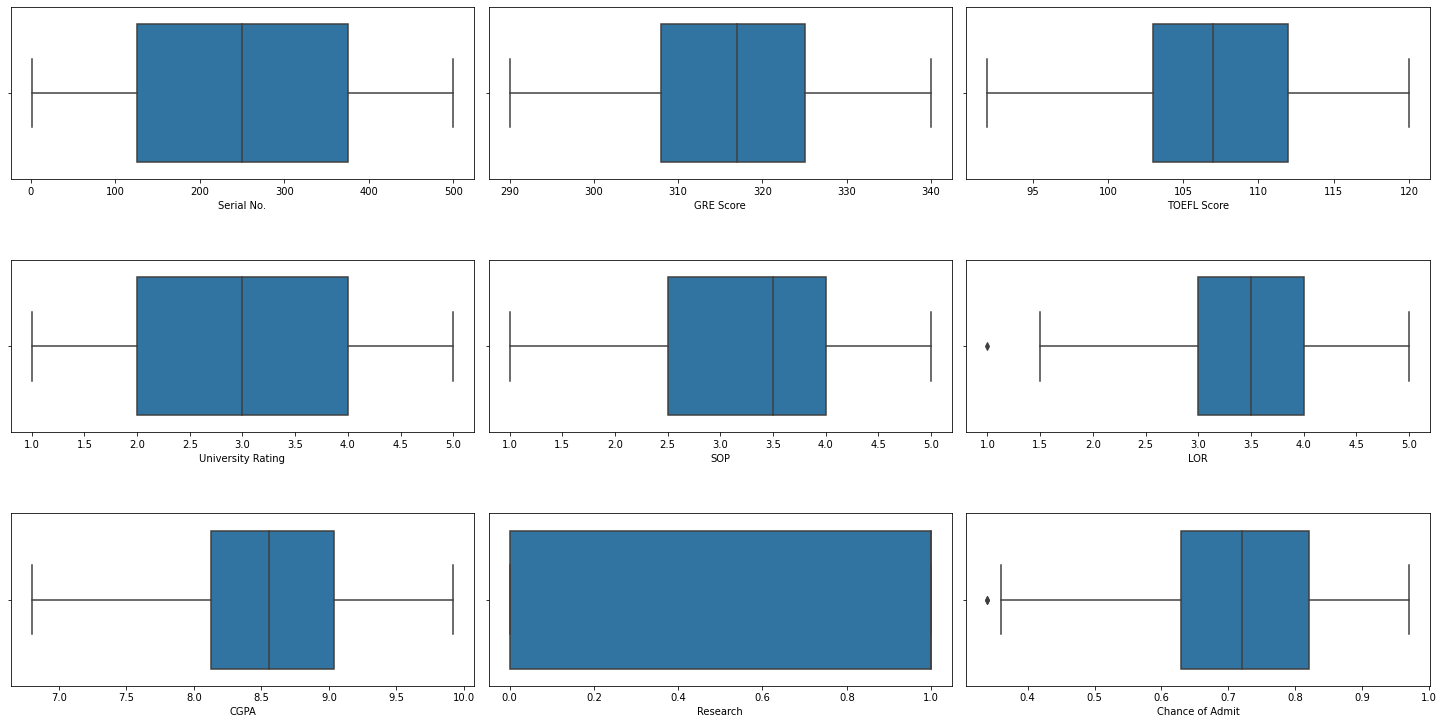

In [13]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.boxplot(x = col, data = df, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Observation**

* There is a outlier in the lower side of "Chance of Admit" and "LOR"

**Histplot**

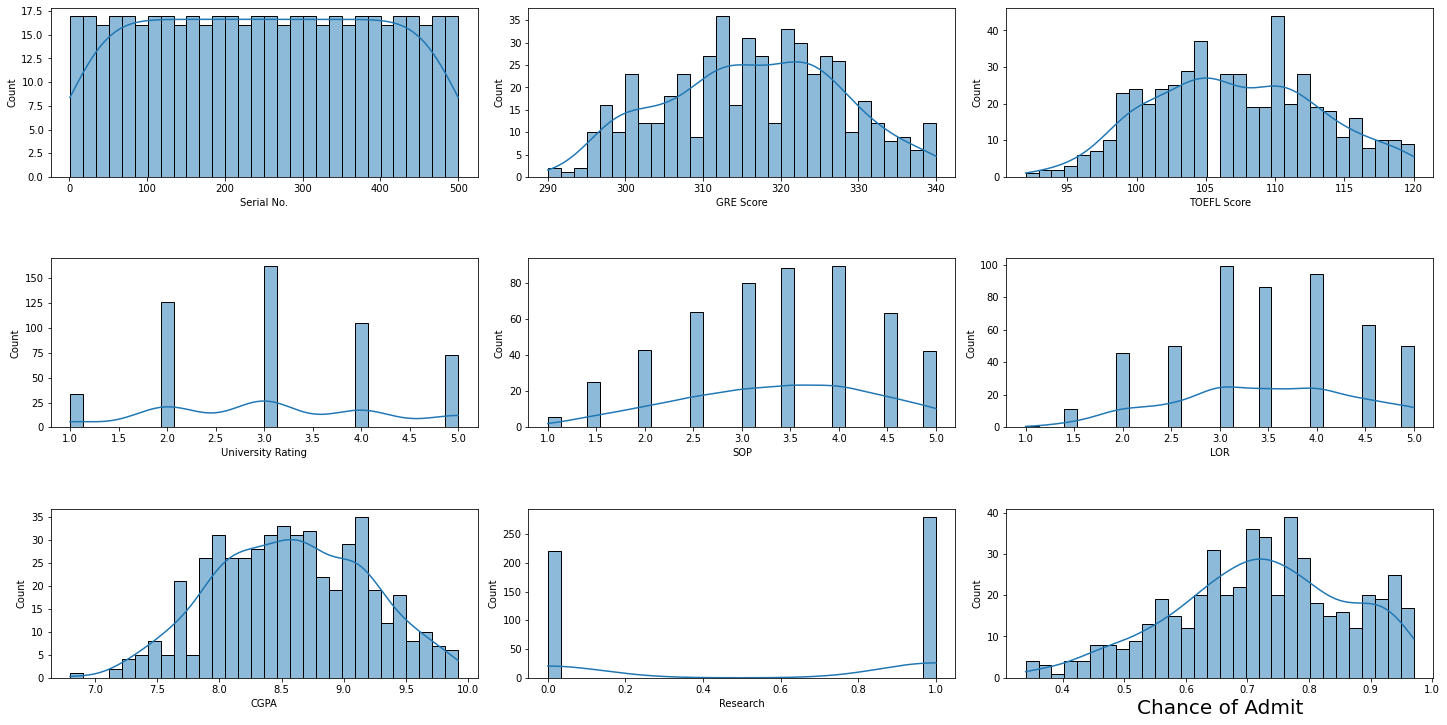

In [14]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.histplot(value, ax=ax[index], kde=True, bins=30)
  plt.xlabel(col, fontsize=20)
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

**Countplot**

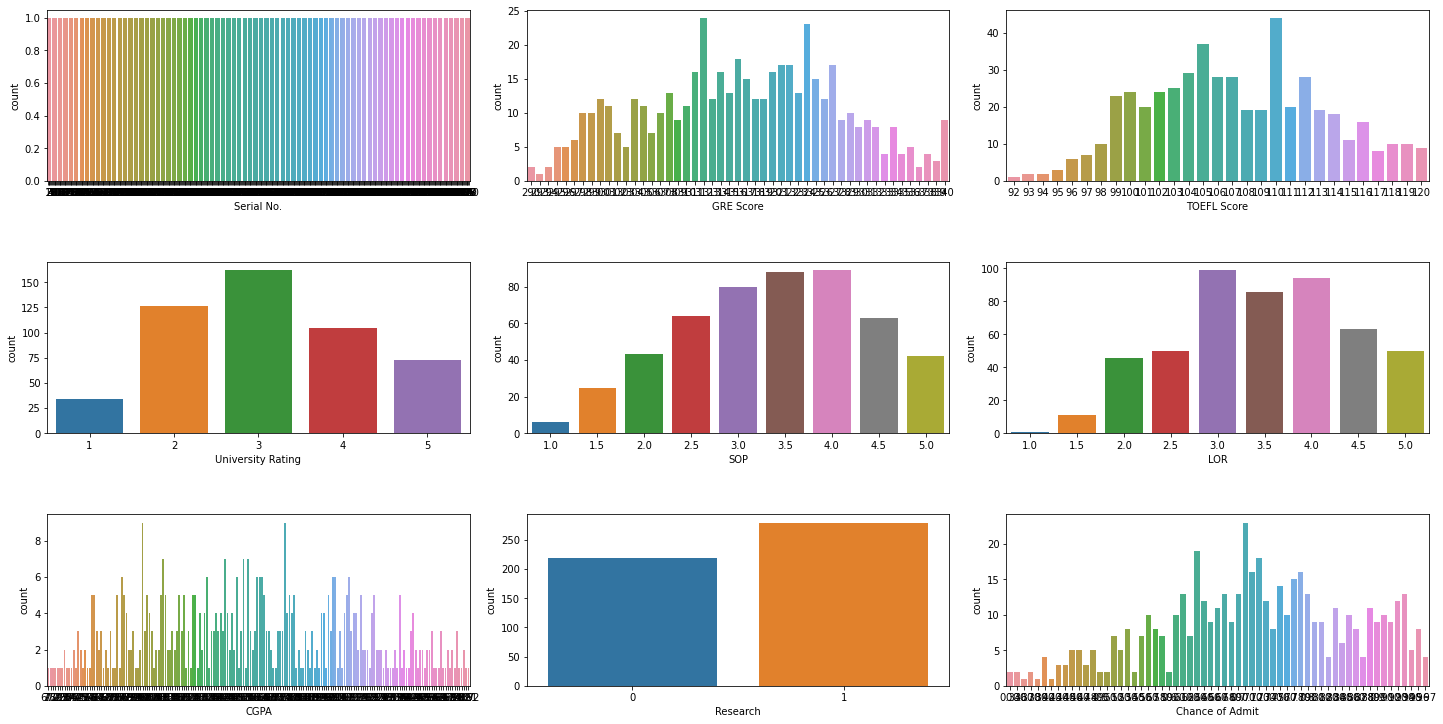

In [15]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.countplot(value, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# **Bivariate Analysis**

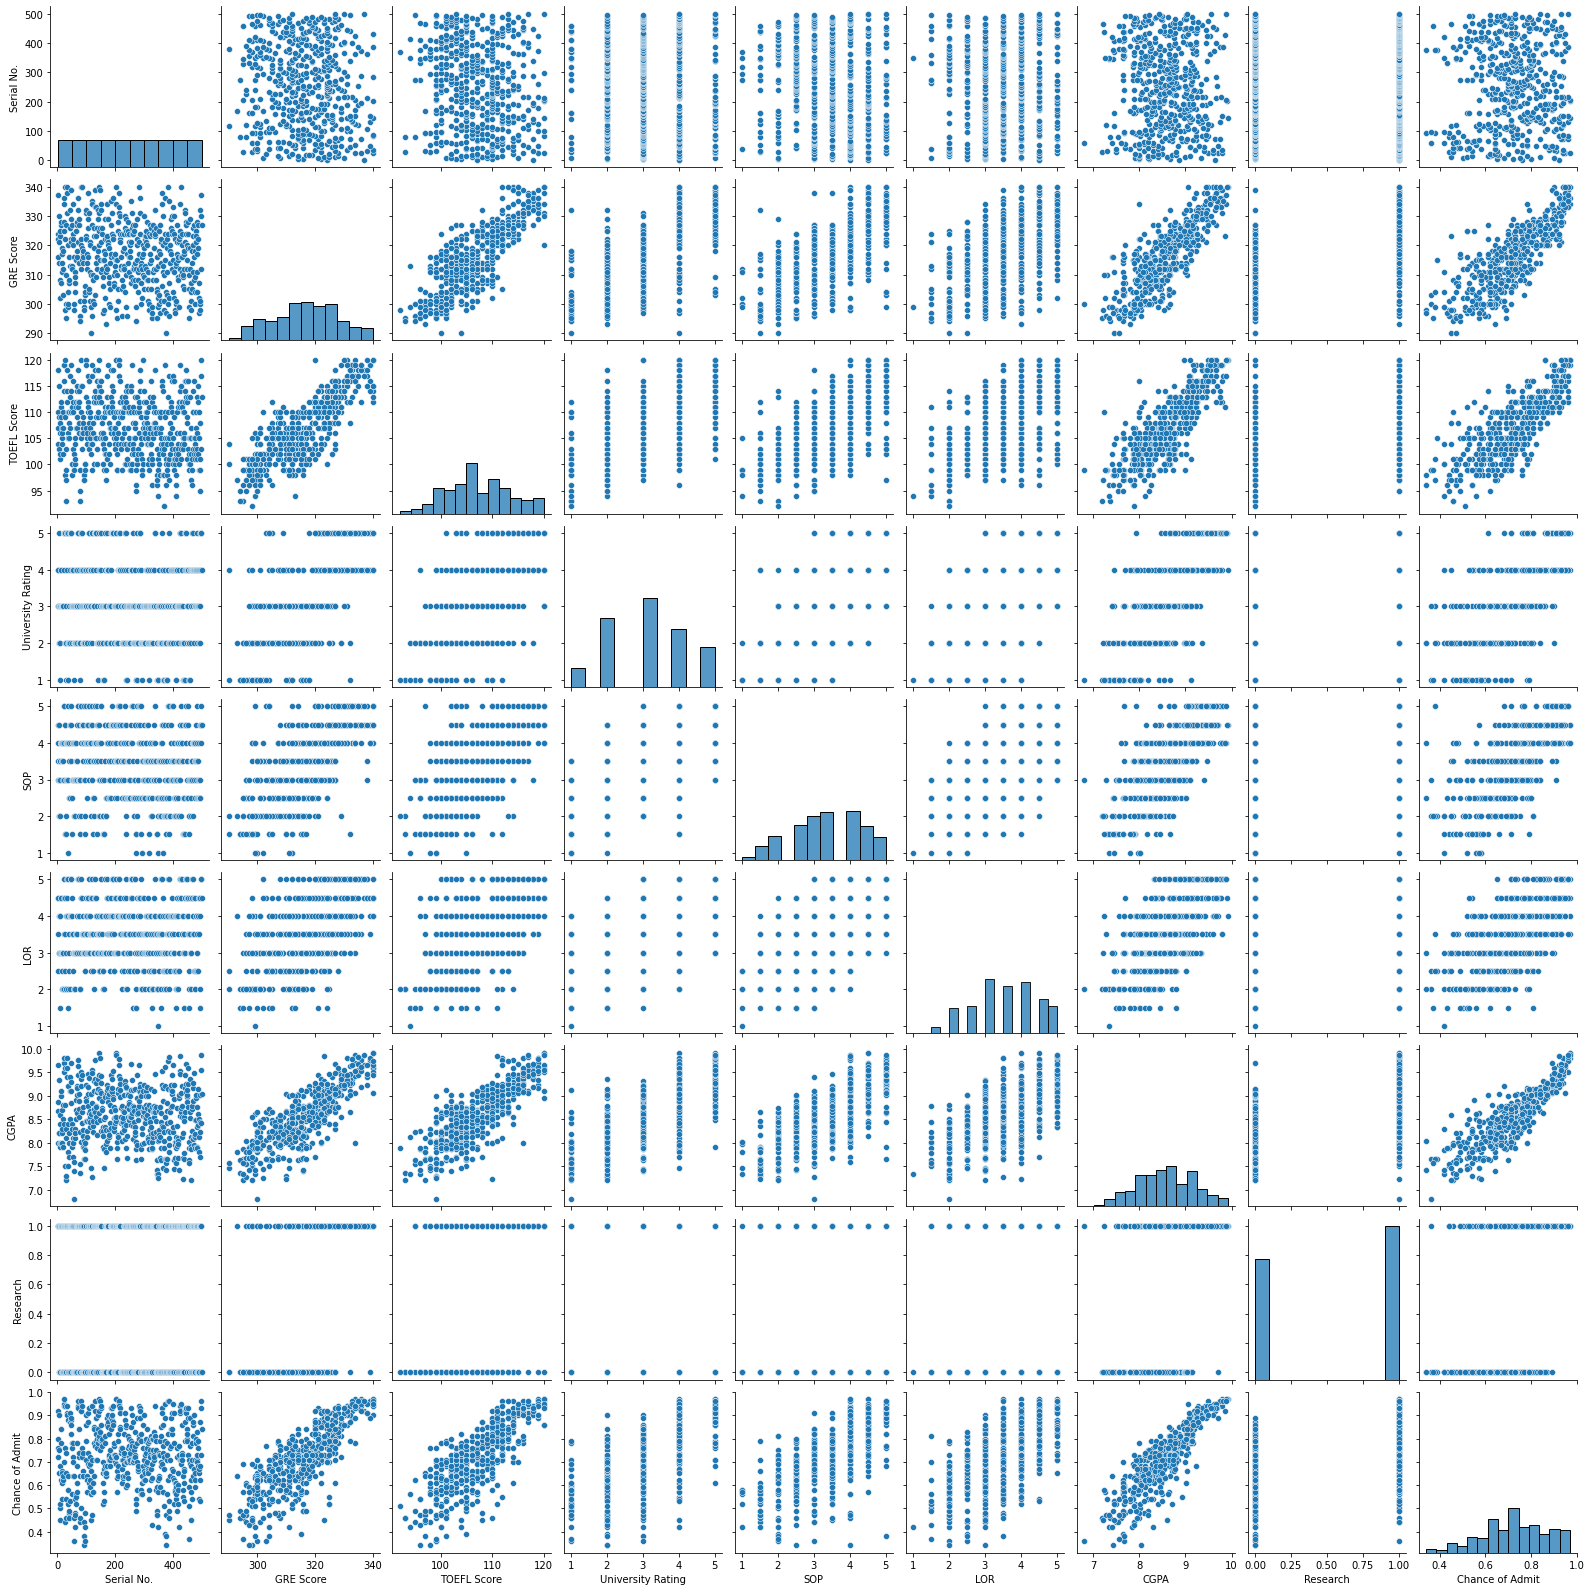

In [16]:
sns.pairplot(df)

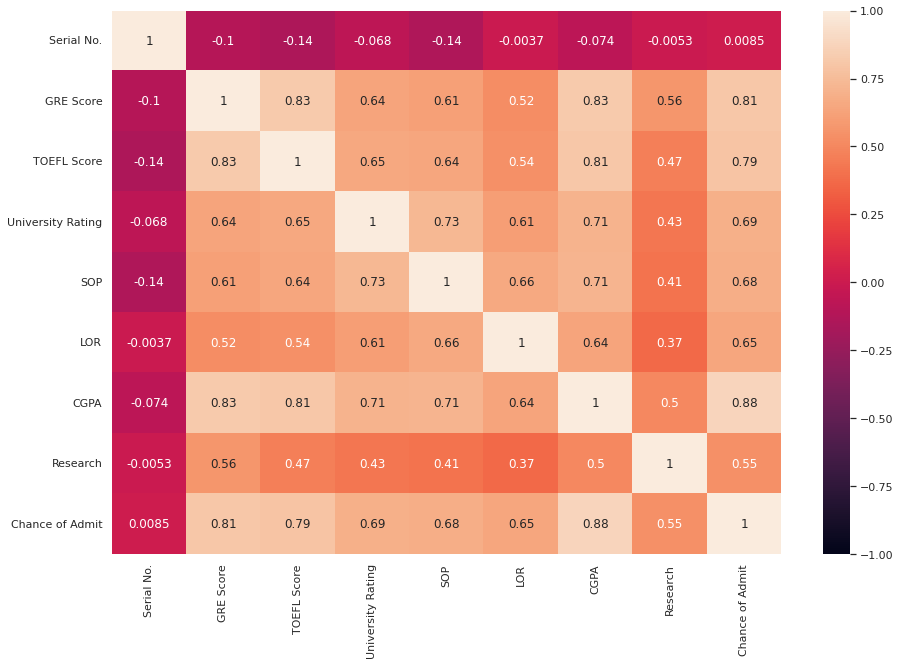

In [17]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = df.corr(), annot=True,  vmin=-1, vmax=1)

**Observation**
* Drop 'Serial No.' feature from the dataset, beacuse it is of no use
* GRE Score' and 'TOEFL Score' are highly correlated with CGPA 

In [18]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [19]:
df.drop(['Serial No.','GRE Score', 'TOEFL Score'], axis = 1, inplace = True)

# **Segregating dependent and independet features**

In [20]:
X = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [21]:
X.head()

,University Rating,SOP,LOR,CGPA,Research
0,4,4.5,4.5,9.65,1
1,4,4.0,4.5,8.87,1
2,3,3.0,3.5,8.00,1
3,3,3.5,2.5,8.67,1
4,2,2.0,3.0,8.21,0


In [22]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# **Train Test Split**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=34)

In [24]:
X_train.head()

,University Rating,SOP,LOR,CGPA,Research
162,3,3.0,3.0,8.50,0
266,2,2.0,2.5,8.45,0
237,5,4.5,5.0,9.19,1
170,2,2.5,3.5,8.04,1
441,1,1.5,3.0,8.66,1


## **VIF Check**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(X_train.columns)
print(vif)

Index(['University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], dtype='object')
[21.173706817246895, 37.77822555658735, 29.967354600051138, 26.23874669668462, 3.0153271953405385]


**Observation**
* Usually we take the fatures having VIF <= 5 but in this problem if we delete the features with the help of VIF then only two fetaures will be left. So, we will lost all the features that's why I have not deleted the features based on VIF

**Code to remove features via VIF, but in this case I have tried but results was not promising**

In [26]:
# ### Remove var with high VIF one by one in while loop
# # X_train2 = X_train
# while (max(vif) > 5):    
#     indx = vif.index(max(vif)) #Get the index of variable with highest VIF
#     # X_train2 = 
#     X_train.drop(X_train.columns[indx],axis = 1, inplace = True)
#     vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
# print(X_train.columns)
# print(vif)

# **Scaling**

In [27]:
scaler = StandardScaler()

In [28]:
X_train_tf = scaler.fit_transform(X_train)
X_test_tf = scaler.transform(X_test) # only transform to avoid data leakage

# **Model Creation**

## **SVR Model**

In [29]:
model_SVR = SVR()

In [30]:
model_SVR.fit(X_train_tf, y_train)

SVR()

### **Train Accuracy**

In [31]:
train_score = model_SVR.score(X_train_tf, y_train)
train_score

0.7709840134242646

### **Store Model using Pickle**

In [32]:
import pickle

with open('AdmissionSVR.pkl', 'wb') as f:
    pickle.dump(model_SVR,f)

In [33]:
model_SVR_load = pickle.load(open('AdmissionSVR.pkl', 'rb'))

**For Single Random Record**

In [34]:
#Considering features : University Rating, SOP, LOR, CGPA, Research
test1 = scaler.transform([[5,4.5,4.5,9.6,1]])
test2 = scaler.transform([[5,4.5,3.5,8.8,0]])

**Pickle Verification**

**With Model read from pickle**

In [35]:
model_SVR_load.predict(test1)

array([0.89218621])

In [36]:
model_SVR_load.predict(test2)

array([0.74716424])

**With Model**

In [37]:
model_SVR.predict(test1)

array([0.89218621])

In [38]:
model_SVR.predict(test2)

array([0.74716424])

### **Test Data**

### **Prediction of test data**

In [39]:
y_predict_SVR = model_SVR_load.predict(X_test_tf)

In [40]:
print(f"MSE : {round(mean_squared_error(y_test, y_predict_SVR),2)}\nMAE : {round(mean_absolute_error(y_test, y_predict_SVR),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, y_predict_SVR)),2)}")

MSE : 0.01
MAE : 0.06
RMSE : 0.08


In [41]:
SVR_r2_score=r2_score(y_test, y_predict_SVR)
SVR_adj_r2_score=1-((1-SVR_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(SVR_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(SVR_adj_r2_score*100,2)}%")

R-Squared Accuracy : 69.395 % 
Adjusted R-Squared Accuracy : 68.43%


## **GridSearchCV**

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf']}

In [44]:
model_GRID_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
model_GRID_SVR.fit(X_train_tf,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.747 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.735 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.692 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.791 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.870 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.602 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.747 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [45]:
print(model_GRID_SVR.best_estimator_)

SVR(C=10, gamma=1, kernel='linear')


**Train Accuracy**

In [46]:
model_GRID_SVR.score(X_train_tf, y_train)

0.7925913121879745

**Test Accuracy**

In [47]:
y_predict_grid = model_GRID_SVR.predict(X_test_tf)

In [48]:
print(f"MSE : {round(mean_squared_error(y_test, y_predict_grid),2)}\nMAE : {round(mean_absolute_error(y_test, y_predict_grid),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, y_predict_grid)),2)}")

MSE : 0.0
MAE : 0.05
RMSE : 0.07


In [49]:
GRID_r2_score=r2_score(y_test, y_predict_grid)
GRID_adj_r2_score=1-((1-GRID_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(GRID_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(GRID_adj_r2_score*100,2)}%")

R-Squared Accuracy : 76.156 % 
Adjusted R-Squared Accuracy : 75.41%


## **Linear Regression Model**

In [50]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [51]:
linear_reg.fit(X_train_tf, y_train)

LinearRegression()

**Train Accuracy**

In [52]:
linear_reg.score(X_train_tf,y_train)

0.8133727526859142

In [53]:
linear_reg_pred=linear_reg.predict(X_test_tf)

In [54]:
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 0.0
MAE : 0.05
RMSE : 0.07


In [55]:
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 78.376 % 
Adjusted R-Squared Accuracy : 77.7%


## **Ridge Regression Model**

In [56]:
ridge_reg=Ridge()
ridge_reg

Ridge()

In [57]:
ridge_reg.fit(X_train_tf, y_train)

Ridge()

**Train Accuracy**

In [58]:
ridge_reg.score(X_train_tf,y_train)

0.8133648507470717

In [59]:
ridge_reg_pred=ridge_reg.predict(X_test_tf)

In [60]:
print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")

MSE : 0.0
MAE : 0.05
RMSE : 0.07


In [61]:
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 78.331 % 
Adjusted R-Squared Accuracy : 77.65%


## **Lasso Regression Model**

In [62]:
lasso_reg=Lasso()

In [63]:
lasso_reg.fit(X_train_tf, y_train)

Lasso()

**Train Accuracy**

In [64]:
lasso_reg.score(X_train_tf,y_train)

0.0

In [65]:
lasso_reg_pred=lasso_reg.predict(X_test_tf)

In [66]:
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")

MSE : 0.02
MAE : 0.11
RMSE : 0.14


In [67]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : -0.576 % 
Adjusted R-Squared Accuracy : -3.74%


## **Elastic Net Regression Model**

In [68]:
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [69]:
elastic_reg.fit(X_train_tf, y_train)

ElasticNet()

**Train Accuracy**

In [70]:
elastic_reg.score(X_train_tf,y_train)

0.0

In [71]:
elastic_reg_pred=elastic_reg.predict(X_test_tf)

In [72]:
print(f"MSE : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\nMAE : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")

MSE : 0.02
MAE : 0.11
RMSE : 0.14


In [73]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(elastic_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : -0.576 % 
Adjusted R-Squared Accuracy : -3.74%


# **Comparisions of all Models**

In [74]:
print(f"--------------------------------------")
print(f"MSE:\n1. SVR : {round(mean_squared_error(y_test, y_predict_SVR),2)}\n2. Linear Regression : {round(mean_squared_error(y_test, linear_reg_pred),2)}\n3. Ridge Regression : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\n4. Lasso Regression : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\n5. Elastic Net Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\n6. GridSearchCV SVR : {round(mean_squared_error(y_test, y_predict_grid),2)}")
print(f"---------------------------------------")
print(f"MAE:\n1. SVR : {round(mean_absolute_error(y_test, y_predict_SVR),2)}\n2. Linear Regression : {round(mean_absolute_error(y_test, linear_reg_pred),2)}\n3. Ridge Regression : {round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n4. Lasso Regression : {round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n5. Elastic Net Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}\n6. GridSearchCV SVR  : {round(mean_absolute_error(y_test, y_predict_grid),2)}")
print(f"--------------------------------------")
print(f"RMSE:\n1. SVR : {round(np.sqrt(mean_squared_error(y_test, y_predict_SVR)),2)}\n2. Linear Regression : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}\n3. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n4. Lasso Regression : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n5. Elastic Net Regression : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}\n6. GridSearchCV SVR : {round(np.sqrt(mean_squared_error(y_test, y_predict_grid)),2)}")
print(f"--------------------------------------")

--------------------------------------
MSE:
1. SVR : 0.01
2. Linear Regression : 0.0
3. Ridge Regression : 0.0
4. Lasso Regression : 0.02
5. Elastic Net Regression : 0.02
6. GridSearchCV SVR : 0.0
---------------------------------------
MAE:
1. SVR : 0.06
2. Linear Regression : 0.05
3. Ridge Regression : 0.05
4. Lasso Regression : 0.11
5. Elastic Net Regression : 0.11
6. GridSearchCV SVR  : 0.05
--------------------------------------
RMSE:
1. SVR : 0.08
2. Linear Regression : 0.07
3. Ridge Regression : 0.07
4. Lasso Regression : 0.14
5. Elastic Net Regression : 0.14
6. GridSearchCV SVR : 0.07
--------------------------------------


In [75]:
print("Train Accuracy")
print(f"--------------------------------------")
print(f"R-Squared Accuracy:\n1. SVR : {round(model_SVR.score(X_train_tf, y_train)*100,3)} %\n2. Linear Regression : {round(linear_reg.score(X_train_tf, y_train)*100,3)} %\n3. Ridge Regression : {round(ridge_reg.score(X_train_tf, y_train)*100,3)} %\n4. Lasso Regression : {round(lasso_reg.score(X_train_tf, y_train)*100,3)} %\n5. Elastic Net Regression : {round(elastic_reg.score(X_train_tf, y_train)*100,3)} %%\n6. GridSearchCV SVR : {round(model_GRID_SVR.score(X_train_tf, y_train)*100,3)} % ")
print(f"--------------------------------------")

Train Accuracy
--------------------------------------
R-Squared Accuracy:
1. SVR : 77.098 %
2. Linear Regression : 81.337 %
3. Ridge Regression : 81.336 %
4. Lasso Regression : 0.0 %
5. Elastic Net Regression : 0.0 %%
6. GridSearchCV SVR : 79.259 % 
--------------------------------------


In [76]:
print("Test Accuracy")
print(f"--------------------------------------")
print(f"R-Squared Accuracy:\n1. SVR : {round(SVR_r2_score*100,3)} %\n2. Linear Regression : {round(linear_reg_r2_score*100,3)} %\n3. Ridge Regression : {round(ridge_reg_r2_score*100,3)} %\n4. Lasso Regression : {round(lasso_reg_r2_score*100,3)} %\n5. Elastic Net Regression : {round(elastic_reg_r2_score*100,3)} %%\n6. GridSearchCV SVR : {round(GRID_r2_score*100,3)} % ")
print(f"--------------------------------------")
print(f"Adjusted R-Squared Accuracy:\n1. SVR : {round(SVR_adj_r2_score*100,3)} %\n2. Linear Regression : {round(linear_reg_adj_r2_score*100,3)} %\n3. Ridge Regression : {round(ridge_reg_adj_r2_score*100,3)} %\n4. Lasso Regression : {round(lasso_reg_adj_r2_score*100,3)} %\n5. Elastic Net Regression : {round(elastic_reg_adj_r2_score*100,3)} %\n6. GridSearchCV SVR : {round(GRID_adj_r2_score*100,3)} %")
print(f"--------------------------------------")

Test Accuracy
--------------------------------------
R-Squared Accuracy:
1. SVR : 69.395 %
2. Linear Regression : 78.376 %
3. Ridge Regression : 78.331 %
4. Lasso Regression : -0.576 %
5. Elastic Net Regression : -0.576 %%
6. GridSearchCV SVR : 76.156 % 
--------------------------------------
Adjusted R-Squared Accuracy:
1. SVR : 68.433 %
2. Linear Regression : 77.696 %
3. Ridge Regression : 77.649 %
4. Lasso Regression : -3.739 %
5. Elastic Net Regression : -3.739 %
6. GridSearchCV SVR : 75.406 %
--------------------------------------


**Conclusion**
* GridSearchCV SVR model is our best result having test accuracy as 75.40 % and train accuracy as 79.25
* Both train and test accuracy are close to each other, hence our model is a general model having low bias and low variance 